In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
test = pd.read_csv("C:/Users/Ilsaf/Desktop/howpop_test.csv")
train = pd.read_csv("C:/Users/Ilsaf/Desktop/howpop_train.csv")

In [6]:
train.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

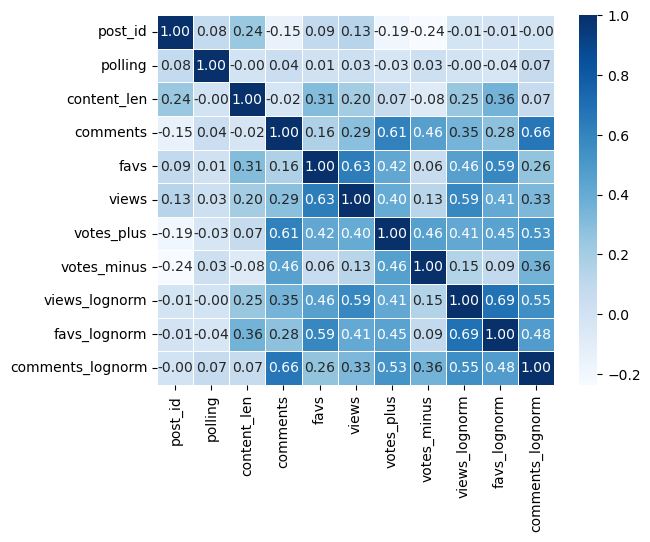

In [8]:
sns.heatmap(train.select_dtypes(["int", "float", "bool"]).corr(), annot=True, cmap="Blues", fmt=".2f", linewidths=0.5);

In [9]:
(train.select_dtypes(["int", "float", "bool"]).corr() > 0.9).sum()

post_id             1
polling             1
content_len         1
comments            1
favs                1
views               1
votes_plus          1
votes_minus         1
views_lognorm       1
favs_lognorm        1
comments_lognorm    1
dtype: int64

In [10]:
train["published"] = pd.to_datetime(train["published"], format="%Y-%m-%d %H:%M:%S")

In [11]:
train.dtypes

url                         object
domain                      object
post_id                      int64
published           datetime64[ns]
author                      object
flow                        object
polling                       bool
content_len                  int64
title                       object
comments                     int64
favs                         int64
views                        int64
votes_plus                 float64
votes_minus                float64
views_lognorm              float64
favs_lognorm               float64
comments_lognorm           float64
dtype: object

In [12]:
train["year"] = train["published"].dt.year

In [13]:
train.tail()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm,year
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,1.870174,2.124862,1.258447,2016
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,-0.091464,-0.511814,0.465118,2016
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,0.198924,-0.656390,-0.408714,2016
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,0.124244,-0.655385,0.389636,2016
134136,https://habrahabr.ru/post/314088/,habrahabr.ru,314088,2016-10-31 23:56:00,@Mgrin,develop,False,9359,mgr-forms-react: Простой компонент для простей...,4,35,3100,12.0,1.0,-1.004391,-0.290955,-0.613330,2016


In [14]:
count_publiсations_per_year = train.groupby("year", as_index=False).agg(count_publications=("post_id", "count"))

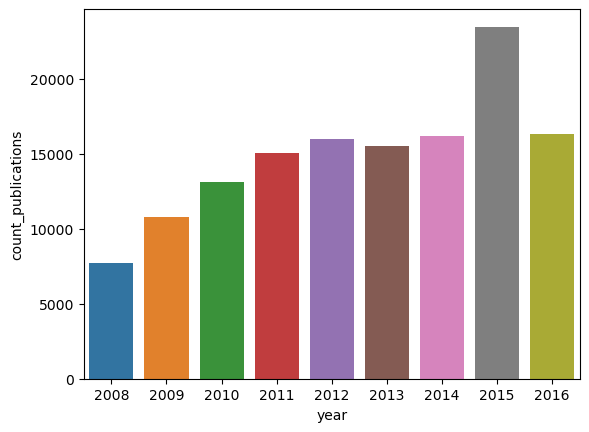

In [15]:
sns.barplot(data=count_publiсations_per_year, x="year", y="count_publications");

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 3))

bow = count_vectorizer.fit_transform(train["title"])
bow.shape
len(count_vectorizer.vocabulary_)
count_vectorizer.vocabulary_["python"]

12550